In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv('amazon.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
# Check for missing values
df.fillna({'rating_count': 0}, inplace=True)

In [9]:
# convert to numerical format
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

In [11]:
# convert column to integer value and remove commas if present
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce').astype('Int64')

In [13]:
# Extract relevant product categories from category column
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0] if '|' in x else x)

In [15]:
# Create discount_amount column
df['discount_amount'] = df['actual_price'] - df['discounted_price']

In [17]:
# Convert discount_percentage to numeric
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%', ''), errors='coerce')

In [19]:
# Display first few rows
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,discount_amount
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,245.0


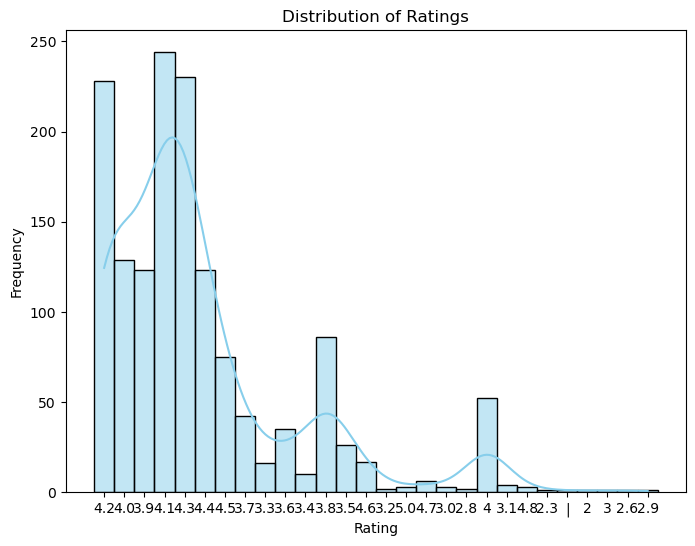

In [21]:
# distribution of ratings using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Correlation between discount_percentage and rating. 
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

correlation = df['discount_percentage'].corr(df['rating'])
print(f"Correlation between discount_percentage and rating: {correlation:.2f}")

Correlation between discount_percentage and rating: -0.16


In [25]:
# Top-selling product categories
top_selling_categories = df.groupby('main_category')['rating_count'].sum().sort_values(ascending=False)
print("Top-Selling Product Categories:\n", top_selling_categories.head(10))

Top-Selling Product Categories:
 main_category
Electronics              15778848
Computers&Accessories     7728689
Home&Kitchen              2991069
OfficeProducts             149675
MusicalInstruments          88882
Toys&Games                  15867
HomeImprovement              8566
Health&PersonalCare          3663
Car&Motorbike                1118
Name: rating_count, dtype: Int64


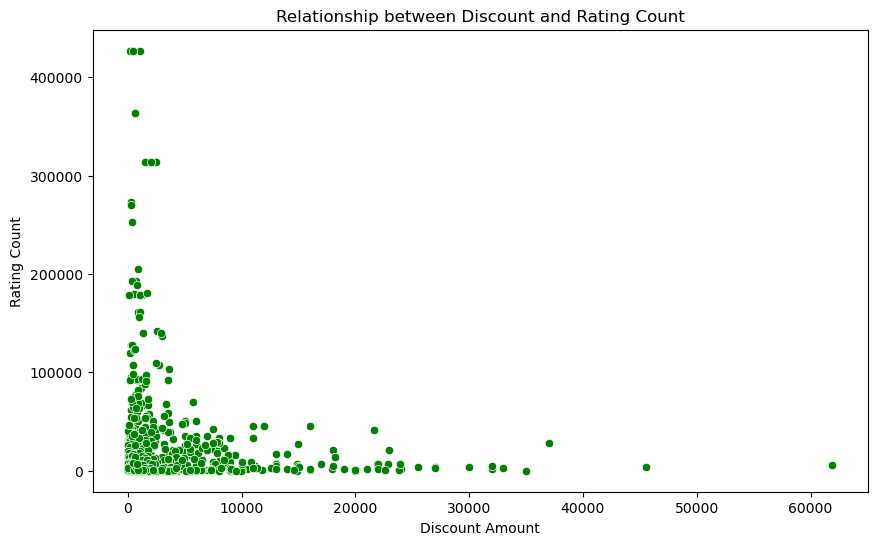

In [27]:
# Relationship between discount and rating_count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_amount', y='rating_count', data=df, color='green')
plt.title('Relationship between Discount and Rating Count')
plt.xlabel('Discount Amount')
plt.ylabel('Rating Count')
plt.show()

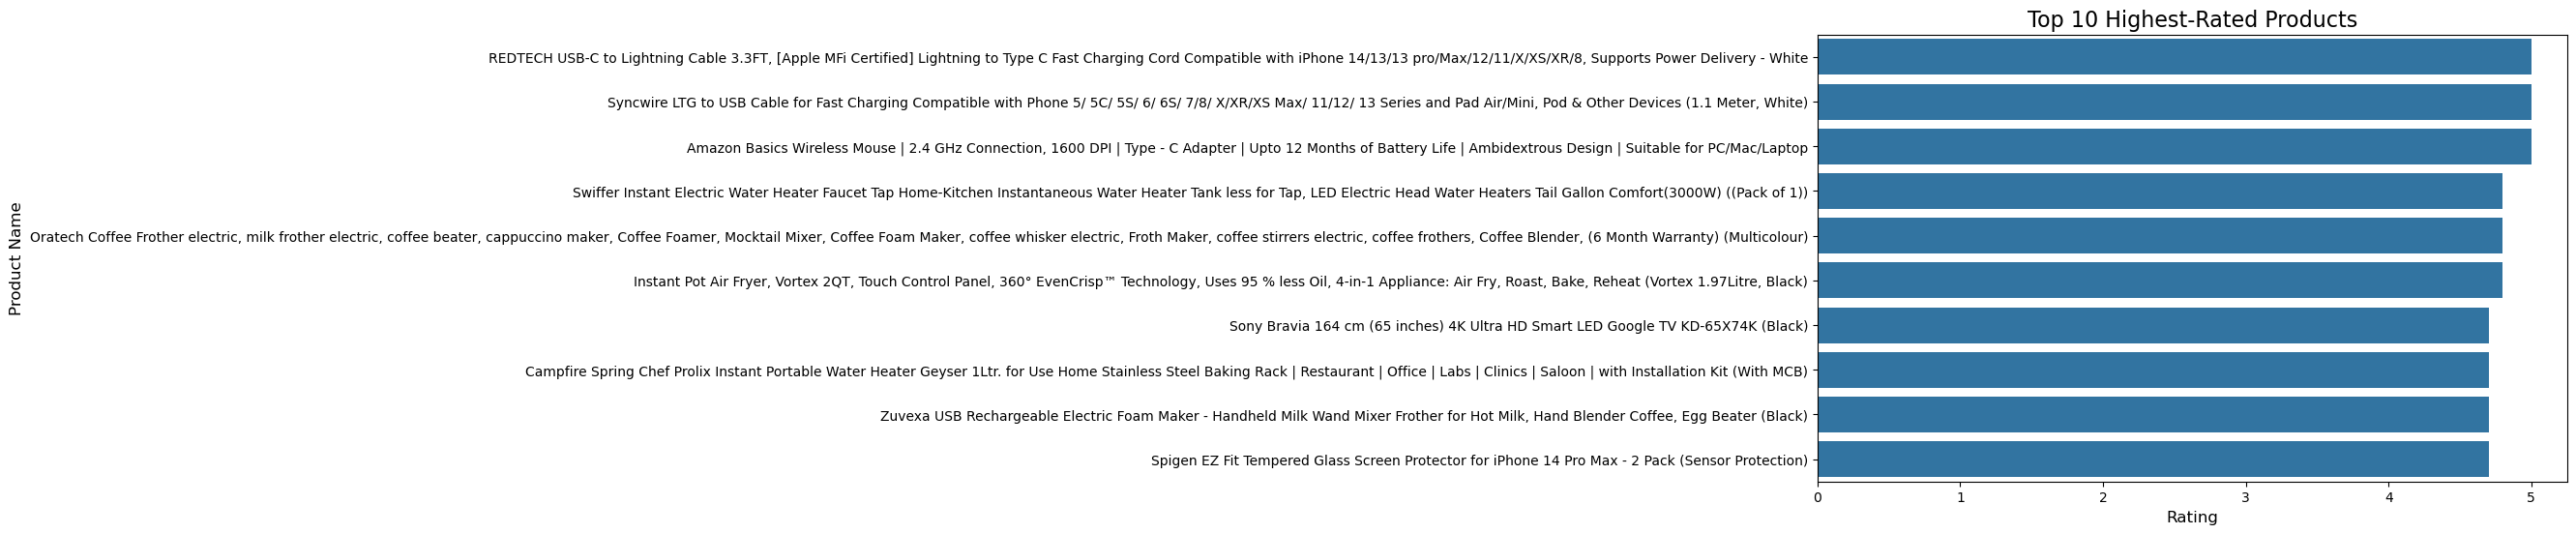

In [29]:
top_rated_products = df[['product_name', 'rating']].sort_values(by='rating', ascending=False).head(10)

# Create a bar chart for the top 10 highest-rated products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated_products, x='rating', y='product_name')

# Add title and labels
plt.title('Top 10 Highest-Rated Products', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Display the plot
plt.show()

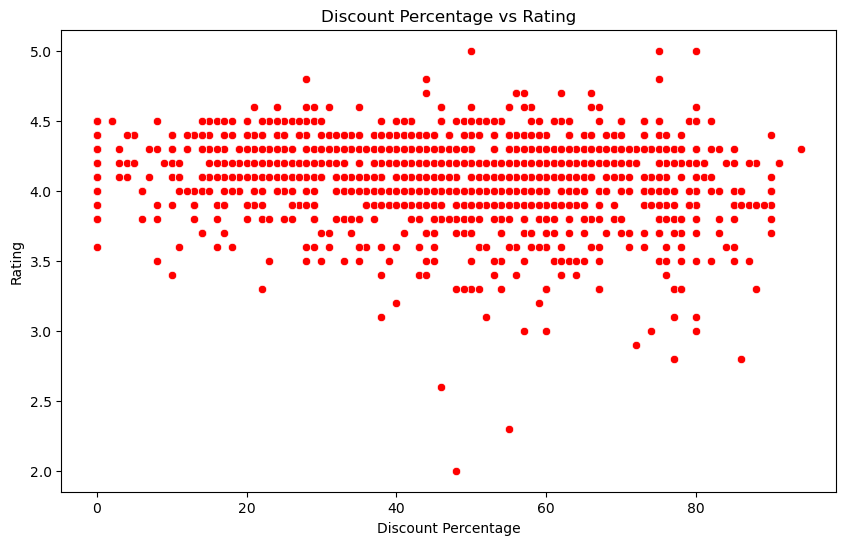

In [31]:
# Scatter plot of discount_percentage vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df, color='red')
plt.title('Discount Percentage vs Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

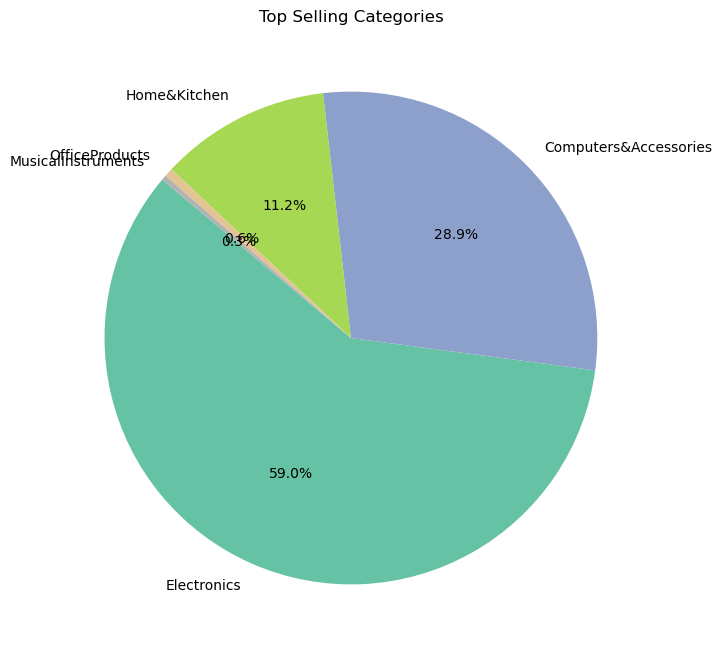

In [33]:
# Pie chart for top-selling categories
plt.figure(figsize=(10, 8))
top_selling_categories.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set2')
plt.title('Top Selling Categories')
plt.ylabel('')
plt.show()

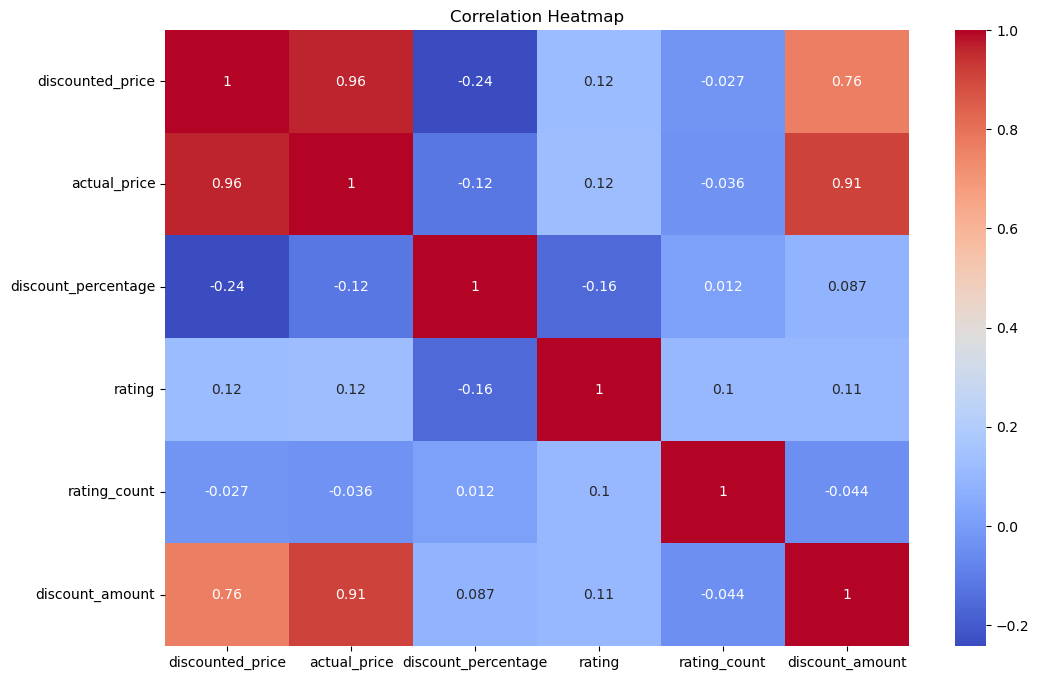

In [35]:
# Heatmap showing correlations between numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'discount_amount']].astype(float).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()